A quick exercise in working with an api. Pulling a list of data science jobs and analysing the relationship between maximum salary and number of applications to the job. This data is pulled from the Reed.co.uk API

https://www.reed.co.uk/developers/jobseeker

I'm running a simple linear regression "by hand" to demonstrate the relationship and work out my linear algebra muscles.

In [1]:
#for this project we'll need:
#requests to pull the data from an API
import requests
#HTTPBasicAuth to pass along my credentials
from requests.auth import HTTPBasicAuth
#pandas to work with the data in dataframe form
import pandas as pd
#numpy for various numerical operations
import numpy as np
#matplotlib for data exploration and reporting results
from matplotlib import pyplot as plt

In [2]:
#user credentials and API URL (note the data-science keywords)
URL = "https://www.reed.co.uk/api/1.0/search?keywords=data-science"
user = #enter your API key here

In [3]:
#pull data
r = requests.get(url = URL, auth = HTTPBasicAuth(user, ''))

In [4]:
#load the data
data = r.json()

In [5]:
#take a quick look at the data that was pulled
data

{'results': [{'jobId': 50980134,
   'employerId': 389257,
   'employerName': 'Morgan McKinley',
   'employerProfileId': None,
   'employerProfileName': None,
   'jobTitle': 'Data Science Manager',
   'locationName': 'London',
   'minimumSalary': 80000.0,
   'maximumSalary': 80000.0,
   'currency': 'GBP',
   'expirationDate': '19/09/2023',
   'date': '08/08/2023',
   'jobDescription': "We are currently hiring for a Data Science Manager position for a renowned Telecom client of ours. the role will be based in either London or Bristol. This is a full-time, permanent position with options for flexible hybrid work arrangements. The company's Finance Centre of Excellence (CoE) plays a crucial role within the Group FP&amp;A team. The primary objective of the Finance CoE is to enhance the value derived from investments in SAP and to ... ",
   'applications': 14,
   'jobUrl': 'https://www.reed.co.uk/jobs/data-science-manager/50980134'},
  {'jobId': 50938687,
   'employerId': 383872,
   'employe

In [6]:
#format this data into a dataframe
df = pd.DataFrame(data['results'])
df.head()

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl
0,50980134,389257,Morgan McKinley,None,None,Data Science Manager,London,80000.0,80000.0,GBP,19/09/2023,08/08/2023,We are currently hiring for a Data Science Man...,14,https://www.reed.co.uk/jobs/data-science-manag...
1,50938687,383872,Rutherford Briant,None,None,Data Science Lead,CO49YA,90000.0,110000.0,GBP,13/09/2023,01/08/2023,"Data Science Lead - Remote - Up to 100,000 Are...",28,https://www.reed.co.uk/jobs/data-science-lead/...
2,50963399,331522,Harnham - Data & Analytics Recruitment,None,None,Data Science Manager,London,75000.0,85000.0,GBP,15/09/2023,04/08/2023,Data Science Manager (Technical Lead) London 1...,17,https://www.reed.co.uk/jobs/data-science-manag...
3,50986900,575264,Reed,None,None,Data Science Lead,M405BP,735.0,735.0,GBP,08/09/2023,08/08/2023,Reed Secure is a specialist provider of perman...,13,https://www.reed.co.uk/jobs/data-science-lead/...
4,50980247,379777,Yolk Recruitment Ltd,None,None,Data Science Manager,London,100000.0,116000.0,GBP,19/09/2023,08/08/2023,Data Science Manager | DV CLEARANCE REQ | Up t...,14,https://www.reed.co.uk/jobs/data-science-manag...


In [7]:
#let's see how many rows we pulled from the API
df.shape

(100, 15)

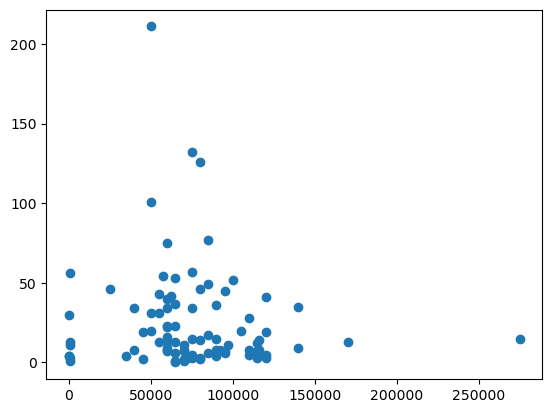

In [8]:
#plot the salary against the amount of applications
plt.scatter(df['maximumSalary'], df["applications"])

Naturally, we'll want to get rid of all the 0s and outliers.

In [9]:
#create a dataframe with the two features we are interested in
frame  = df[["maximumSalary", "applications"]]

In [10]:
#count the number of rpws without salary data
frame.isna().sum()

maximumSalary    11
applications      0
dtype: int64

In [11]:
#drop all rows with no salary data
frame = frame.dropna()

In [12]:
#remove outliers that are too small or too large
frame = frame[frame["maximumSalary"] > 10000]
frame = frame[frame["maximumSalary"] < 200000]
#this 'ones' column is for the regression
frame['ones'] = 1

In [13]:
#let's check how much data we're working with
frame.shape

(80, 3)

In [14]:
#split the data into x and y 
x, y = frame[["ones", "maximumSalary"]], frame["applications"]

In [15]:
#calculate the transpose of x for the linear regression
xT = x.transpose()
xT

,0,1,2,4,5,7,8,9,10,11,...,84,86,87,91,92,93,94,95,96,99
ones,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
maximumSalary,80000.0,110000.0,85000.0,116000.0,116000.0,115000.0,140000.0,170000.0,115000.0,120000.0,...,55000.0,97000.0,50000.0,65000.0,60000.0,60000.0,60000.0,60000.0,70000.0,70000.0


In [16]:
#compute xTx by the dot product of x and the transpose of x
xTx = xT.dot(x)
xTx

,ones,maximumSalary
ones,80.0,6.372750e+06
maximumSalary,6372750.0,5.654598e+11


In [17]:
#similarly compute xTy by the dot product of y and the transpose of x
xTy = xT.dot(y)
xTy

ones                  2085.0
maximumSalary    151753080.0
dtype: float64

In [18]:
#finding m and b by the dot product of xTy and the inverse of xTx
mb = np.linalg.inv(xTx).dot(xTy)

In [19]:
#let's see what our regression values are
mb[0], mb[1]

(45.817617135452906, -0.0002479948798927039)

So the regression line is y = -0.00027x + 49.17162

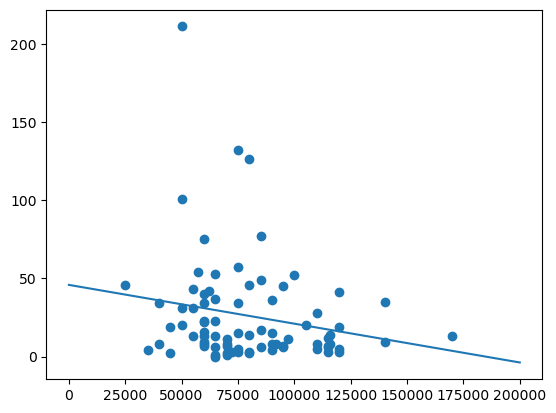

In [20]:
#plot the regression line
ln = np.linspace(0, 200000, 11)
plt.plot(ln, mb[1]*ln+mb[0], linestyle='solid') 
#plot the maximum salary to applications scatter plot
plt.scatter(x['maximumSalary'], y)
plt.show()

So there is a negative correlation between the maximum offered salary price and the maximum amount of money offered. This isn't too surprising, jobs with a higher maximum salary likely require more specialized skills and so the qualified applicant pool would be smaller.